## Observations and Insights 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mice = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='left')
# Display the data table for preview
combined_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = combined_mice["Mouse ID"].count()
mice_count

#unique number of mice
#combined_df["Mouse ID"].nunique()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mice.loc[combined_mice.duplicated(['Mouse ID', 'Timepoint']),"Mouse ID"].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mice_df = combined_mice.loc[combined_mice['Mouse ID'] != "g989"]
combined_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
rows_duplicate = combined_mice.loc[combined_mice['Mouse ID'] == "g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.
combined_mice_df["Mouse ID"].count()

1880

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_drug = combined_mice_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median_drug = combined_mice_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
std_drug = combined_mice_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem_drug = combined_mice_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame({"Mean Tumor Volume": mean_drug, "Median Tumor Volume": median_drug, "STD of Tumor Volume": std_drug,
                          "SEM Tumor Volume": sem_drug})

summary_df

,Mean Tumor Volume,Median Tumor Volume,STD of Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
ramicane = combined_mice_df.loc[combined_mice_df["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
ramicane_mean = np.mean(ramicane)
ramicane_median = np.median(ramicane)
ramicane_variance = np.var(ramicane,ddof = 0)
ramicane_std = np.std(ramicane,ddof = 0)
ramicane_sem = ramicane.sem(axis = 0)

capomulin = combined_mice_df.loc[combined_mice_df["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
capomulin_mean = np.mean(capomulin)
capomulin_median = np.median(capomulin)
capomulin_variance = np.var(capomulin,ddof = 0)
capomulin_std = np.std(capomulin,ddof = 0)
capomulin_sem = capomulin.sem(axis = 0)

infubinol = combined_mice_df.loc[combined_mice_df["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
infubinol_mean = np.mean(infubinol)
infubinol_median = np.median(infubinol)
infubinol_variance = np.var(infubinol,ddof = 0)
infubinol_std = np.std(infubinol,ddof = 0)
infubinol_sem = infubinol.sem(axis = 0)

placebo = combined_mice_df.loc[combined_mice_df["Drug Regimen"] == "Placebo", "Tumor Volume (mm3)"]
placebo_mean = np.mean(placebo)
placebo_median = np.median(placebo)
placebo_variance = np.var(placebo,ddof = 0)
placebo_std = np.std(placebo,ddof = 0)
placebo_sem = placebo.sem(axis = 0)

ceftamin = combined_mice_df.loc[combined_mice_df["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]
ceftamin_mean = np.mean(ceftamin)
ceftamin_median = np.median(ceftamin)
ceftamin_variance = np.var(ceftamin,ddof = 0)
ceftamin_std = np.std(ceftamin,ddof = 0)
ceftamin_sem = ceftamin.sem(axis = 0)

stelasyn = combined_mice_df.loc[combined_mice_df["Drug Regimen"] == "Stelasyn", "Tumor Volume (mm3)"]
stelasyn_mean = np.mean(stelasyn)
stelasyn_median = np.median(stelasyn)
stelasyn_variance = np.var(stelasyn,ddof = 0)
stelasyn_std = np.std(stelasyn,ddof = 0)
stelasyn_sem = stelasyn.sem(axis = 0)

zoniferol = combined_mice_df.loc[combined_mice_df["Drug Regimen"] == "Zoniferol", "Tumor Volume (mm3)"]
zoniferol_mean = np.mean(zoniferol)
zoniferol_median = np.median(zoniferol)
zoniferol_variance = np.var(zoniferol,ddof = 0)
zoniferol_std = np.std(zoniferol,ddof = 0)
zoniferol_sem = zoniferol.sem(axis = 0)

ketapril = combined_mice_df.loc[combined_mice_df["Drug Regimen"] == "Ketapril", "Tumor Volume (mm3)"]
ketapril_mean = np.mean(ketapril)
ketaprill_median = np.median(ketapril)
ketapril_variance = np.var(ketapril,ddof = 0)
ketapril_std = np.std(ketapril,ddof = 0)
ketapril_sem = ketapril.sem(axis = 0)

propriva = combined_mice_df.loc[combined_mice_df["Drug Regimen"] == "Propriva", "Tumor Volume (mm3)"]
propriva_mean = np.mean(propriva)
propriva_median = np.median(propriva)
propriva_variance = np.var(propriva,ddof = 0)
propriva_std = np.std(propriva,ddof = 0)
propriva_sem = propriva.sem(axis = 0)

naftisol = combined_mice_df.loc[combined_mice_df["Drug Regimen"] == "Naftisol", "Tumor Volume (mm3)"]
naftisol_mean = np.mean(naftisol)
naftisol_median = np.median(naftisol)
naftisol_variance = np.var(naftisol,ddof = 0)
naftisol_std = np.std(naftisol,ddof = 0)
naftisol_sem = naftisol.sem(axis = 0)


drugs_summary_df = pd.DataFrame({"Drug Regimen":["Ramicane","Capomulin","Infubinol","Placebo","Ceftamin","Stelasyn","Zoniferol","Ketapril", "Propriva","Naftisol"],
                    "Mean Tumor Volume":[ramicane_mean,capomulin_mean,infubinol_mean,placebo_mean,ceftamin_mean,stelasyn_mean,zoniferol_mean,ketapril_mean,propriva_mean,naftisol_mean],
                   "Median Tumor Volume":[ramicane_median,capomulin_median,infubinol_median,placebo_median,ceftamin_median,stelasyn_median,zoniferol_median,ketaprill_median,propriva_median,naftisol_median],
                   "Variance of Tumor Volume":[ramicane_variance,capomulin_variance,infubinol_variance,placebo_variance,ceftamin_variance,stelasyn_variance,zoniferol_variance,ketapril_variance,propriva_variance,naftisol_variance],
                   "Standard Deviation of Tumor Volume":[ramicane_std,capomulin_std,infubinol_std,placebo_std,ceftamin_std,stelasyn_std,zoniferol_std,ketapril_std,propriva_std,naftisol_std],
                    "SEM of Tumor Volume":[ramicane_sem,capomulin_sem,infubinol_sem,placebo_sem,ceftamin_sem,stelasyn_sem,zoniferol_sem,ketapril_sem,propriva_sem,naftisol_sem]})

#drugs_summary_df

# This method produces everything in a single groupby function
grouped_data_df = combined_mice_df.groupby(['Drug Regimen'])
grouped_data_df["Tumor Volume (mm3)"].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [10]:
#drugs_summary_df
ramicane

0      45.000000
1      38.825898
2      35.014271
3      34.223992
4      32.997729
         ...    
449    43.166373
450    45.000000
451    45.877545
452    46.378092
453    44.183451
Name: Tumor Volume (mm3), Length: 228, dtype: float64

In [11]:
drugs_summary_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
0,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
1,Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
3,Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
4,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
5,Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
6,Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
7,Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
8,Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
9,Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

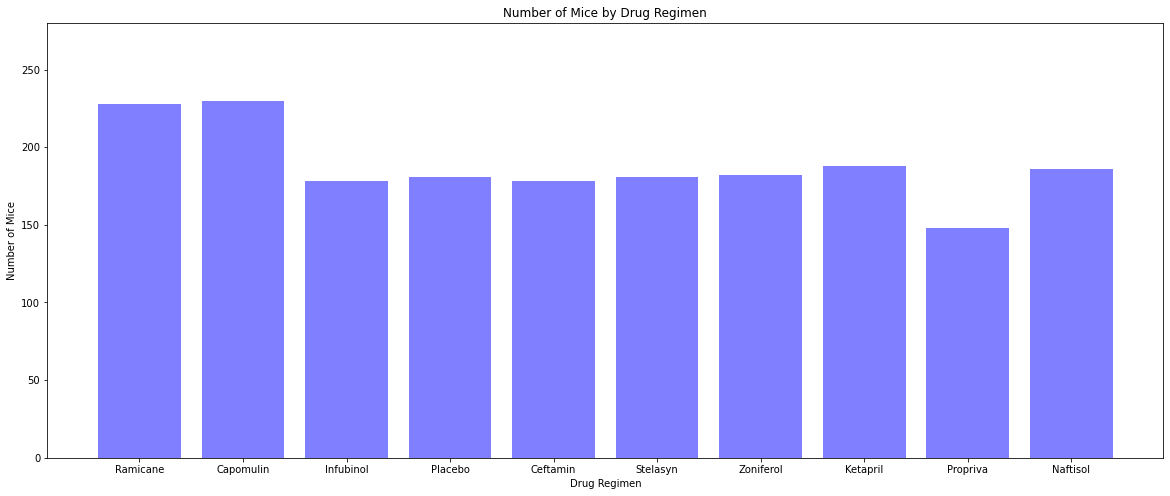

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
ramicane_mice = len(ramicane)
capomulin_mice = len(capomulin)
infubinol_mice = len(infubinol)
placebo_mice = len(placebo)
ceftamin_mice = len(ceftamin)
stelasyn_mice = len(stelasyn)
zoniferol_mice = len(zoniferol)
ketapril_mice = len(ketapril)
propriva_mice = len(propriva)
naftisol_mice = len(naftisol)

mice = [ramicane_mice,capomulin_mice,infubinol_mice,placebo_mice,ceftamin_mice,stelasyn_mice,zoniferol_mice,ketapril_mice,propriva_mice,naftisol_mice]
drug_regimens = ["Ramicane","Capomulin","Infubinol","Placebo","Ceftamin","Stelasyn","Zoniferol","Ketapril","Propriva","Naftisol"]


plt.figure(figsize=(20,8))
x_axis = np.arange(len(mice))
plt.bar(x_axis, mice, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Ramicane","Capomulin","Infubinol","Placebo","Ceftamin","Stelasyn","Zoniferol","Ketapril","Propriva","Naftisol"])

plt.ylim(0, max(mice)+50)

plt.title("Number of Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

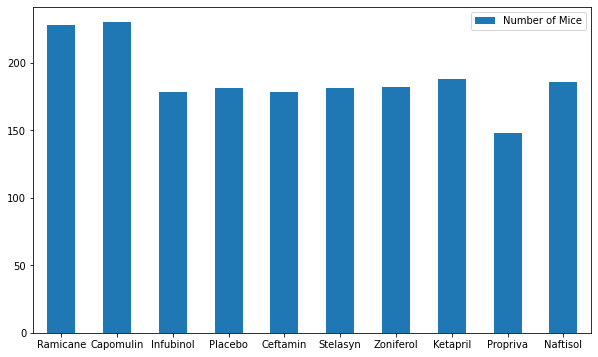

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice = [ramicane_mice,capomulin_mice,infubinol_mice,placebo_mice,ceftamin_mice,stelasyn_mice,zoniferol_mice,ketapril_mice,propriva_mice,naftisol_mice]
drug_regimens_index = ["Ramicane","Capomulin","Infubinol","Placebo","Ceftamin","Stelasyn","Zoniferol","Ketapril","Propriva","Naftisol"]

bar_df = pd.DataFrame({'Number of Mice': mice}, index = drug_regimens_index)
ax = bar_df.plot.bar(rot = 0)

plt.rcParams['figure.figsize'] = (10,6)

(-1.1065502689644005,
 1.1003119175697333,
 -1.1041200173094385,
 1.1079114197007642)

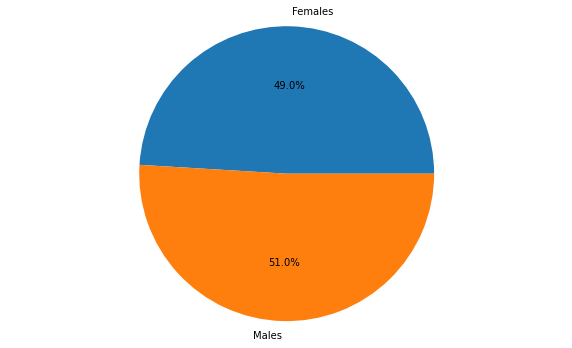

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_mice = combined_mice_df.loc[combined_mice_df["Sex"] == "Male", "Sex"]
male_count = len(male_mice)

female_mice = combined_mice_df.loc[combined_mice_df["Sex"] == "Female", "Sex"]
female_count = len(female_mice)

sex_mice = [female_count, male_count]
sex_index = ["Females","Males"]

plt.pie(sex_mice, labels=sex_index, autopct="%1.1f%%")
plt.axis("equal")

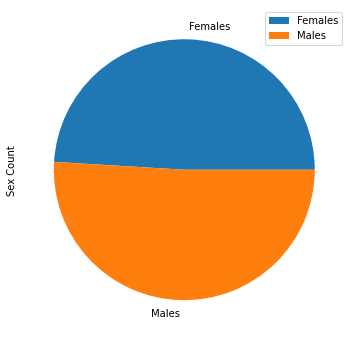

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
piechart_df = pd.DataFrame({'Sex Count':[female_count, male_count]}, index = ['Females','Males'])

pie_plot = piechart_df.plot.pie(subplots = True)


## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

max_tumor = combined_mice_df.groupby('Mouse ID').max()['Timepoint']
max_tumor = max_tumor.reset_index()
#print(max_tumor) 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_df = pd.merge(max_tumor[['Mouse ID', 'Timepoint']], combined_mice_df, how='left', on= 'Mouse ID')

    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
tumor_list = []

for x in drug_list:
    tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == x]['Tumor Volume (mm3)']
    tumor_list.append(tumor_vol)
    #print(tumor_vol)

quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Create empty list to fill with tumor vol data (for plotting)



# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of temperatures is: 47.208427112500004
The upper quartile of temperatures is: 56.801437570000004
The interquartile range of temperatures is: 9.5930104575
The the median of temperatures is: 51.77615728000001 
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


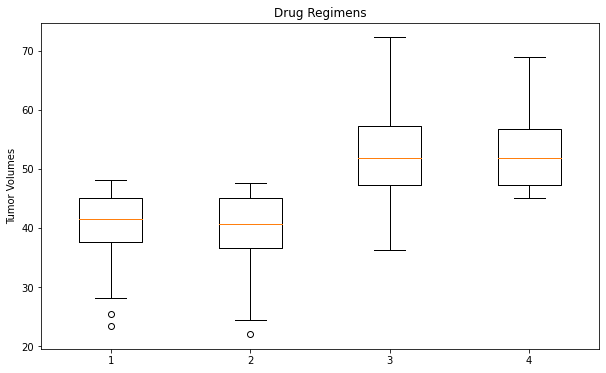

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimens')
ax1.set_ylabel('Tumor Volumes')
ax1.boxplot(tumor_list)
plt.show()

## Line and Scatter Plots

In [20]:
mice_capomulin_df = combined_mice_df.loc[combined_mice_df["Drug Regimen"] == "Capomulin"]
mice_capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


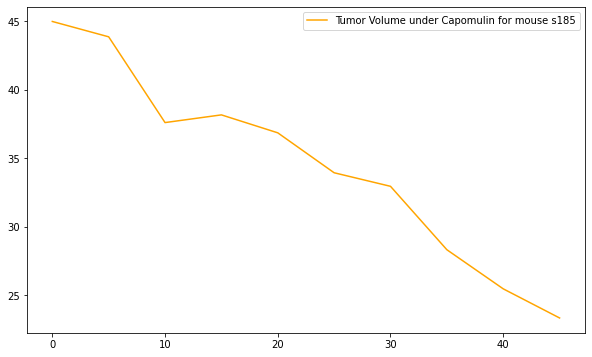

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
example_mouse = mice_capomulin_df.loc[mice_capomulin_df['Mouse ID'] == 's185']


timepoint_list = example_mouse['Timepoint'].to_list()
print(timepoint_list)

tumor_volume_list = example_mouse['Tumor Volume (mm3)'].to_list()
tumor_volume_list


timepoint, = plt.plot(timepoint_list, tumor_volume_list, color="orange", label="Tumor Volume under Capomulin for mouse s185" )
plt.legend(handles = [timepoint], loc ='best')
plt.show()

C:\Users\jayde\anaconda3new\envs\PythonData\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

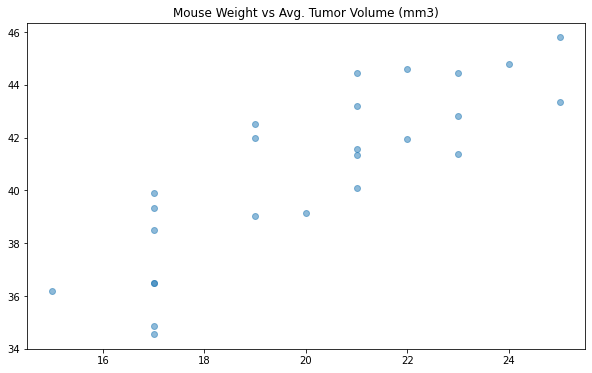

In [52]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = mice_capomulin_df.groupby('Mouse ID').max()['Weight (g)']

    
avg_tumor_volume = mice_capomulin_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)']

#print(avg_tumor_volume)

plt.scatter(mouse_weight,avg_tumor_volume, alpha = 0.5)
plt.title('Mouse Weight vs Avg. Tumor Volume (mm3)')
plt.xlabel(mouse_weight)
plt.ylabel(avg_tumor_volume)
plt.show()

## Correlation and Regression

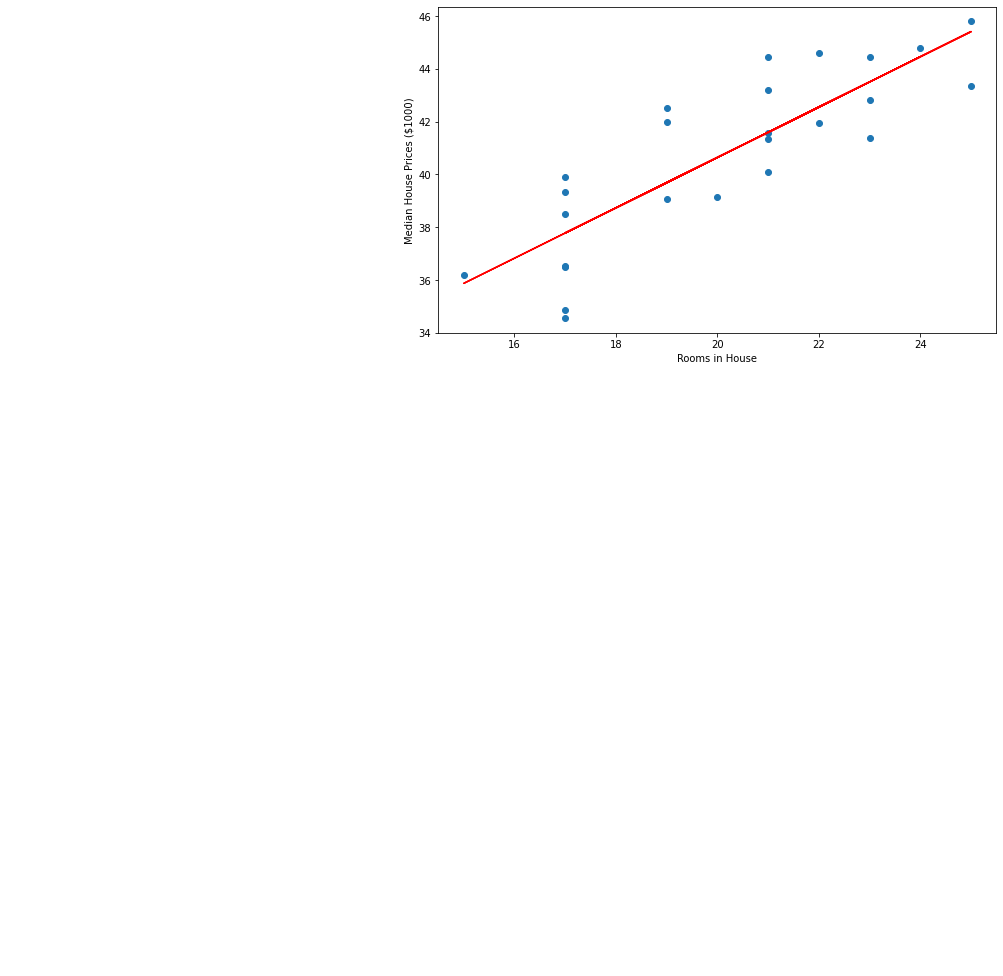

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot
x_values = mouse_weight
y_values = avg_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()